In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sklearn.__version__)

1.5.1


In [3]:
jannik_data = pd.read_csv('jannikh2h.csv')

In [4]:
jannik_data.head(5)

,H2Hs,Opponent,W,L,Win%,TB,TBW,TBL,TB%,First Match,...,DR,A%,DF%,1stIn,1st%,2nd%,SPW,RPW,BPSvd%,BPCnv%
0,12,Daniil Medvedev [RUS],5,7,41.7%,8,5,3,62.5%,17‑Feb‑2020,...,0.93,7.0%,1.5%,62.1%,71.7%,50.5%,63.6%,34.0%,58.8%,36.1%
1,10,Carlos Alcaraz [ESP],4,6,40.0%,8,3,5,37.5%,1‑Apr‑2019,...,1.01,4.1%,3.9%,57.7%,67.8%,52.0%,61.1%,39.4%,68.4%,49.3%
2,9,Stefanos Tsitsipas [GRE],3,6,33.3%,2,0,2,0.0%,13‑May‑2019,...,1.06,5.2%,2.2%,63.4%,72.6%,52.5%,65.2%,36.8%,56.4%,29.9%
3,7,Alex De Minaur [AUS],7,0,100.0%,2,1,1,50.0%,5‑Nov‑2019,...,1.35,6.2%,2.7%,60.7%,75.4%,52.6%,66.5%,45.3%,79.5%,51.7%
4,7,Novak Djokovic [SRB],3,4,42.9%,4,1,3,25.0%,12‑Apr‑2021,...,0.87,8.7%,3.1%,60.1%,70.4%,53.0%,63.5%,31.8%,64.8%,41.0%


In [5]:
jannik_data = jannik_data.sample(frac=1).reset_index(drop=True)

In [6]:
jannik_data.shape

(210, 22)

In [7]:
jannik_data = jannik_data.dropna()

In [8]:
jannik_data.shape

(88, 22)

In [9]:
jannik_data.describe()

,H2Hs,W,L,TB,TBW,TBL,MS,DR
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,2.852273,2.011364,0.840909,1.659091,1.000000,0.659091,2.784091,1.220000
std,2.168424,1.458186,1.380374,1.312069,0.946864,0.869487,2.130506,0.269273
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.680000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.047500
50%,2.000000,2.000000,0.000000,1.000000,1.000000,0.500000,2.000000,1.190000
75%,4.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.250000,1.352500
max,12.000000,7.000000,7.000000,8.000000,5.000000,5.000000,12.000000,2.090000


In [10]:
for col in jannik_data.columns:
    print(jannik_data[col].dtype)

int64
object
int64
int64
object
int64
int64
int64
object
object
object
int64
float64
object
object
object
object
object
object
object
object
object


In [11]:
for col in jannik_data.columns:
    if col not in ['H2Hs', 'Opponent', 'W', 'L', 'TB', 'TBW', 'TBL', 'First Match', 'Last Match', 'DR']:
        if jannik_data[col] is not (int or float):
            jannik_data[col] = jannik_data[col].astype('str')
            jannik_data[col] = jannik_data[col].str.rstrip('%').astype('float') / 100.0
        else:
            jannik_data[col] = jannik_data[col].astype('float')
#jannik_data['Win%'] = jannik_data['Win%'].str.rstrip('%').astype('float') / 100.0
#jannik_data['DR'] = jannik_data['DR'].astype('float')

In [12]:
jannik_data.head()

,H2Hs,Opponent,W,L,Win%,TB,TBW,TBL,TB%,First Match,...,DR,A%,DF%,1stIn,1st%,2nd%,SPW,RPW,BPSvd%,BPCnv%
3,3,Rafael Nadal [ESP],0,3,0.0,1,0,1,0.0,28‑Sep‑2020,...,0.71,0.012,0.036,0.628,0.529,0.424,0.490,0.361,0.459,0.500
4,1,Alexei Popyrin [AUS],0,1,0.0,1,0,1,0.0,3‑May‑2021,...,0.85,0.000,0.030,0.567,0.632,0.414,0.537,0.392,0.333,0.400
7,1,Lukas Lacko [SVK],1,0,1.0,2,1,1,0.5,10‑Jun‑2019,...,1.24,0.118,0.049,0.559,0.772,0.533,0.667,0.412,0.500,0.500
8,2,Maxime Cressy [USA],2,0,1.0,2,1,1,0.5,29‑Jul‑2019,...,1.38,0.084,0.026,0.597,0.826,0.629,0.747,0.351,0.800,0.357
13,1,Mathias Bourgue [FRA],0,1,0.0,1,0,1,0.0,7‑Oct‑2019,...,1.24,0.080,0.000,0.667,0.690,0.690,0.690,0.386,0.429,0.174


Text(0.5, 0, 'Dominance R')

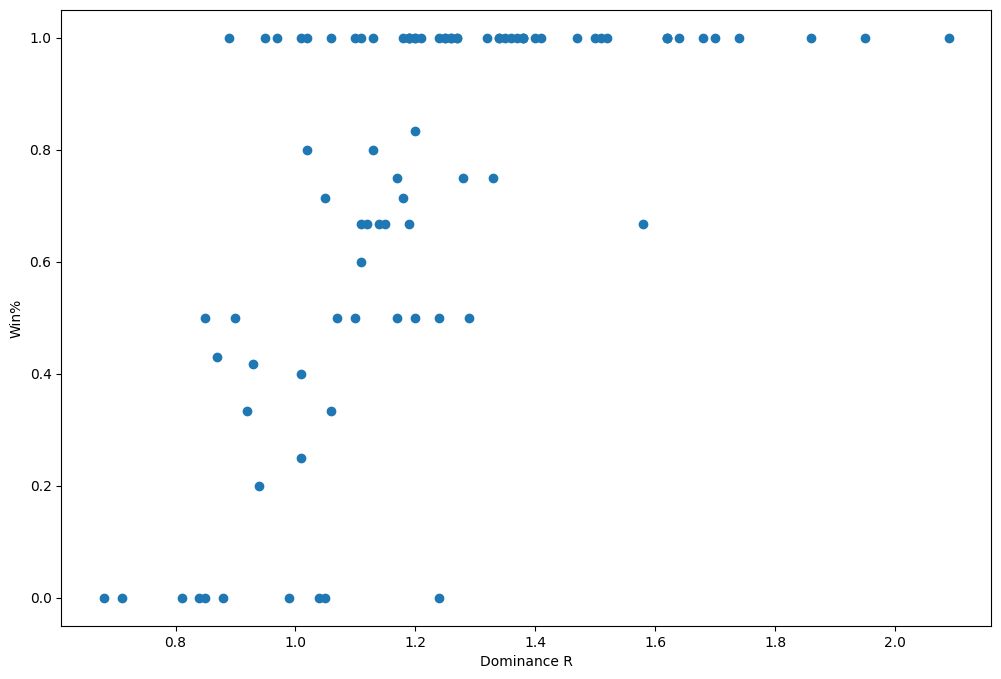

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(jannik_data['DR'], jannik_data['Win%'])
plt.ylabel('Win%')
plt.xlabel('Dominance R')

In [17]:
jannik_data_nostring = jannik_data.drop(['Opponent', 'First Match', 'Last Match'], axis=1)
jannik_data_nostring = jannik_data_nostring.drop(['W', 'L', 'TB', 'TBW', 'TBL', 'MS'], axis=1)
jannik_h2h_corr = jannik_data_nostring.corr()
jannik_h2h_corr

,H2Hs,Win%,TB%,DR,A%,DF%,1stIn,1st%,2nd%,SPW,RPW,BPSvd%,BPCnv%
H2Hs,1.000000,-0.131775,-0.084144,-0.150002,-0.052229,-0.037425,0.031026,-0.040475,-0.072811,-0.068327,-0.136400,0.201316,-0.081311
Win%,-0.131775,1.000000,0.576035,0.605145,0.333490,-0.040434,-0.024502,0.536424,0.321803,0.575876,0.387330,0.329844,0.286323
TB%,-0.084144,0.576035,1.000000,0.336575,0.203421,-0.003566,-0.049599,0.341908,0.098226,0.312185,0.207664,0.152373,0.136400
DR,-0.150002,0.605145,0.336575,1.000000,0.386844,-0.018795,-0.057895,0.726849,0.555835,0.816233,0.570601,0.191365,0.050404
A%,-0.052229,0.333490,0.203421,0.386844,1.000000,0.022913,0.040069,0.614470,0.116623,0.541614,-0.065101,0.188956,0.002853
DF%,-0.037425,-0.040434,-0.003566,-0.018795,0.022913,1.000000,-0.292793,0.052115,-0.260740,-0.132516,0.091875,-0.179664,0.086815
1stIn,0.031026,-0.024502,-0.049599,-0.057895,0.040069,-0.292793,1.000000,-0.053082,-0.065074,0.092707,-0.233632,0.047913,0.134009
1st%,-0.040475,0.536424,0.341908,0.726849,0.614470,0.052115,-0.053082,1.000000,0.234620,0.872127,0.072204,0.240149,-0.001510
2nd%,-0.072811,0.321803,0.098226,0.555835,0.116623,-0.260740,-0.065074,0.234620,1.000000,0.645743,0.068926,0.217710,0.048705
SPW,-0.068327,0.575876,0.312185,0.816233,0.541614,-0.132516,0.092707,0.872127,0.645743,1.000000,0.050558,0.312629,0.062815


<Axes: >

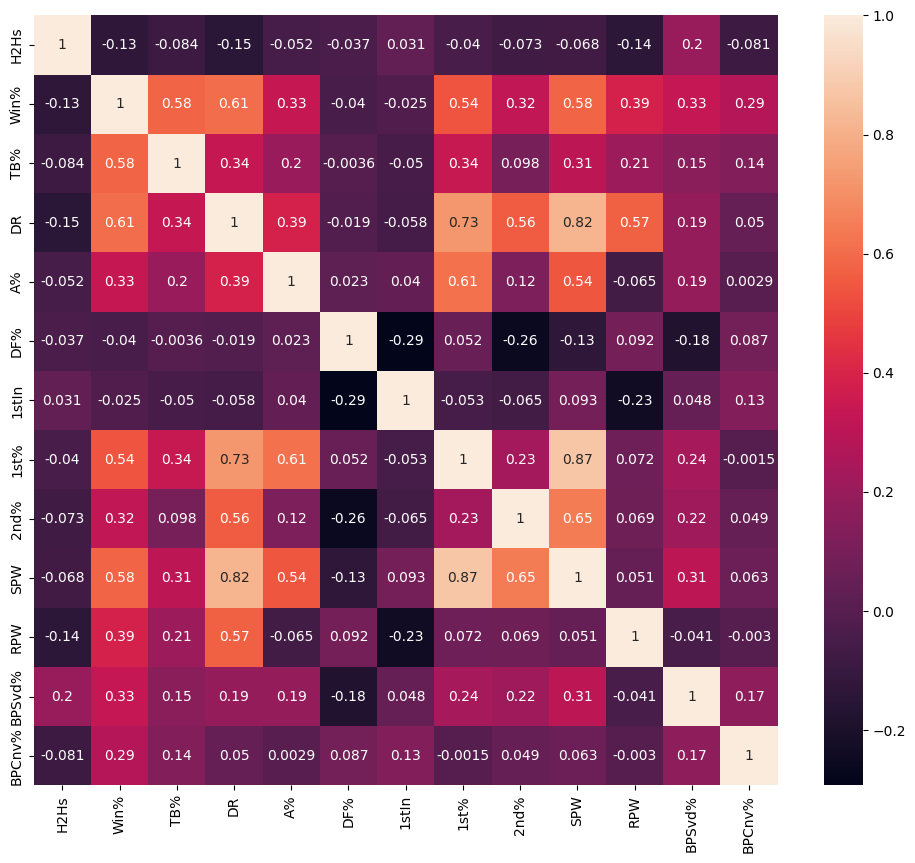

In [18]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(jannik_h2h_corr, annot=True)